28.867513459481287


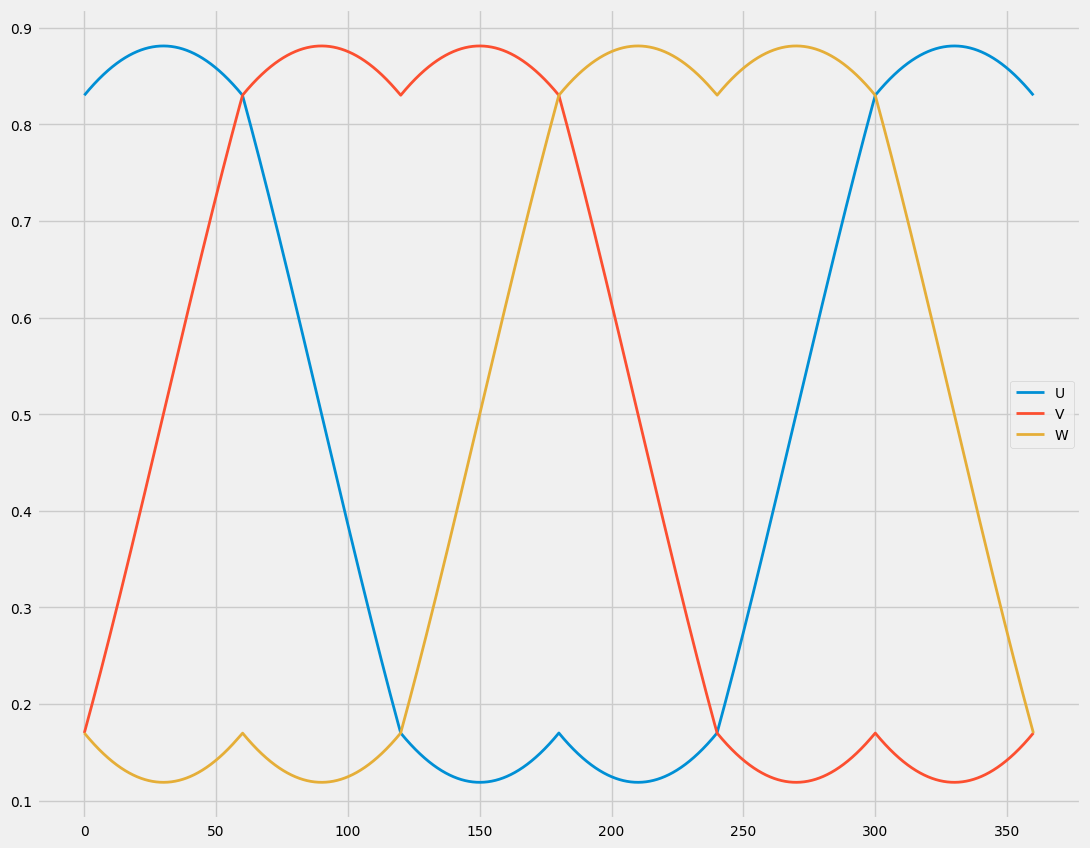

In [1]:
'''
1325
házikó
'''

'''
python -> plain C
optimalizálás
algoritmus leírása
kép a hexagonról
C implementálás ellenőrzése -> kép a pupos szinusz a szög függvényében
ugyanaz jött ki ->C implementáció működik
átírás mikrovezérlőre
pwm kimenetek ellenőrzése
komplementer jelek ellenőrzése
holtidő ellenőrzése
tetszőleges kitöltési tényező ellenőrzése
sampling ellenőrzése
implementáció áthúzása mikrovezérlőre
dc visszaküldése soros porton
szimulációval ellenőrzés
képek az áramokról

további feladatok
mintavételes rész kitalálása
rugalmasság -> soros porton paraméterek állítása
további optimalizálás vs maintainability
lágyindítás
egyes channelek ki-be kapcsolása


'''
def ftri(x, p, a):
    return 4 * a / p * np.abs((x -p / 4) % p  - p/ 2) -a

import numpy as np
import matplotlib.pyplot as plt

plt.style.use(['default', 'fivethirtyeight'])
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['font.size'] = 10

f_out = 50.0
f_pwm = 10.0e3
f_update = 500.0
Vdc = 50.0
Vm = 22
Vmmax = np.sqrt(3)/3.0 * Vdc
print(Vmmax)

dt = 1 / f_pwm * 0.2
tstop = 40e-3
t = 0.0

T_out = 1.0 / f_out
T_pwm = 1.0 / f_pwm
T_update = 1.0 / f_update

MClark = 2 / 3 * np.array([
    [1, -0.5, -0.5],
    [0, np.sqrt(3) / 2, -np.sqrt(3) / 2],
])

Ml2n = Vdc / 3 * np.array([
    [2, -1, -1],
    [-1, 2, -1],
    [-1, -1, 2]
])


Vi= np.array([
    [0, 0],
    [-1.0/3.0, -np.sqrt(3) / 3.0],
    [-1.0/3.0, np.sqrt(3) / 3.0],
    [-2.0 / 3.0, 0.0],
    [2.0 / 3.0, 0.0],
    [1.0 / 3.0, -np.sqrt(3) / 3.0],
    [1.0 / 3.0, np.sqrt(3) / 3.0],
    [0, 0]
]) * Vdc

swt = np.array([[0,0,0,0,1,1,1,1], [0,0,1,1,0,0,1,1], [0,1,0,1,0,1,0,1]]).T


# VREF 
theta = np.linspace(0, 360, 5001)
dcs = np.zeros((3, theta.shape[0]))
for i, theta_i in enumerate(theta):
    Vref = np.array([Vm * np.cos(np.deg2rad(theta_i)), Vm *np.sin(np.deg2rad(theta_i))])
    #plt.plot([0, Vref[0]], [0, Vref[1]], c="C8", linestyle="solid", marker='h', label=r'V$_{ref}$');

    s = 0
    Vl = np.array([])
    Vr = np.array([])
    swl = np.array([])
    swr = np.array([])

    if theta_i >=0 and theta_i <=60:
        s = 1
        Vl = Vi[6].copy()
        Vr = Vi[4].copy()
        swl = swt[6].copy()
        swr = swt[4].copy()
    elif theta_i >=60 and theta_i <=120:
        s = 2
        Vl = Vi[2].copy()
        Vr = Vi[6].copy()
        swl = swt[2].copy()
        swr = swt[6].copy()
    elif theta_i >=120 and theta_i <=180:
        s = 3
        Vl = Vi[3].copy()
        Vr = Vi[2].copy()
        swl = swt[3].copy()
        swr = swt[2].copy()
    elif theta_i >=180 and theta_i <=240:
        s = 4
        Vl = Vi[1].copy()
        Vr = Vi[3].copy()
        swl = swt[1].copy()
        swr = swt[3].copy()
    elif theta_i >=240 and theta_i <=300:
        s = 5
        Vl = Vi[5].copy()
        Vr = Vi[1].copy()
        swl = swt[5].copy()
        swr = swt[1].copy()
    else:
        s=6
        Vl = Vi[4].copy()
        Vr = Vi[5].copy()
        swl = swt[4].copy()
        swr = swt[5].copy()


    A = np.array([Vl, Vr]).T
    b = T_update * Vref.copy()
    T = np.linalg.solve(A, b)
    Toff = T_update - T[0] - T[1]
    #plt.plot([0, T[0]/T_update*Vl[0]], [0, T[0]/T_update*Vl[1]], c="darkviolet")
    #plt.plot([0, T[1]/T_update*Vr[0]], [0, T[1]/T_update*Vr[1]], c="darkviolet")

    dc = 1/T_update * (np.dot(np.array([swl, swr]).T, T) + Toff/2)
    dcs[:, i] = dc.copy()

plt.figure(figsize=(12, 10))
plt.plot(theta, dcs[0])
plt.plot(theta, dcs[1])
plt.plot(theta, dcs[2]);
plt.legend(["U", "V", "W"]);
plt.grid('both')

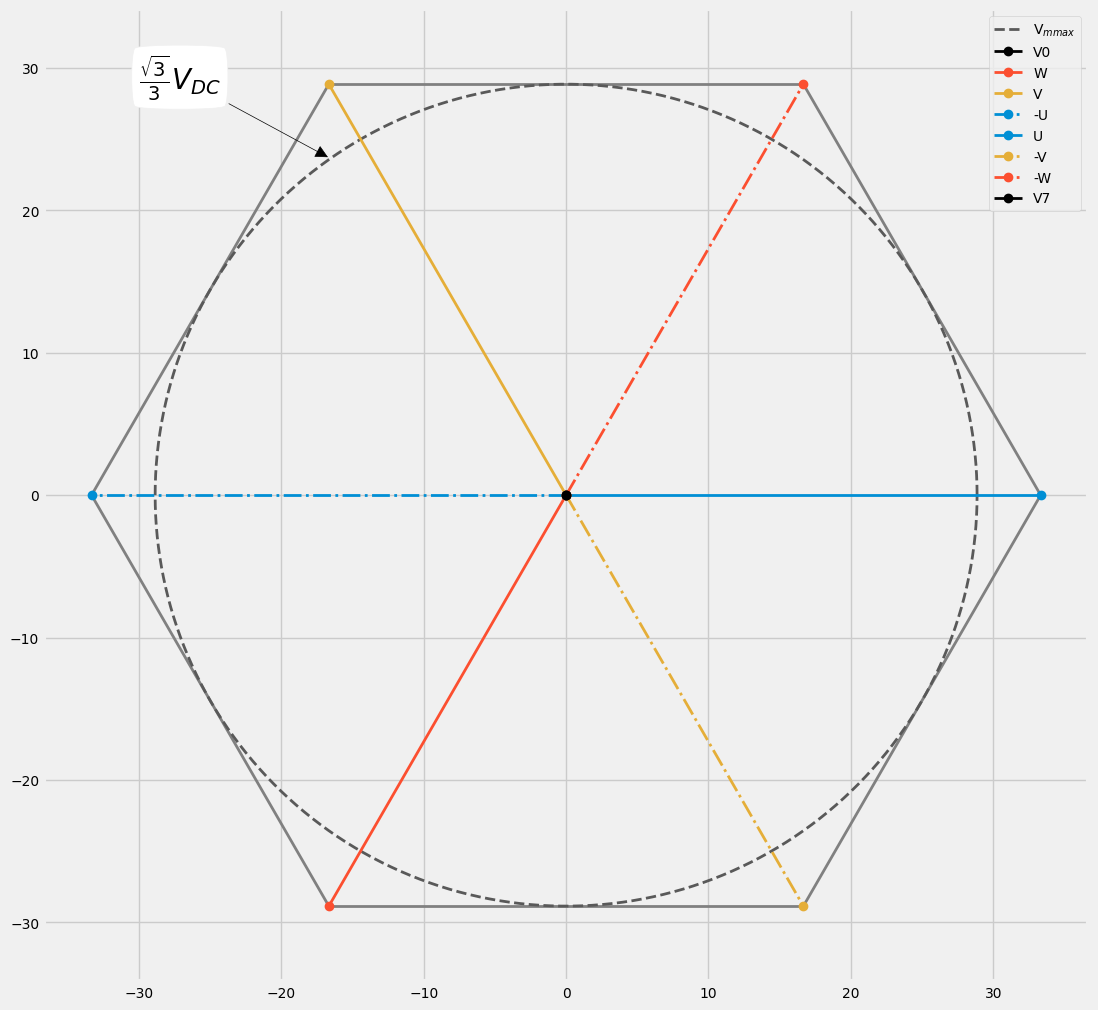

In [18]:
plt.figure(figsize=(12, 12))
plt.plot([Vi[4][0], Vi[6][0]], [Vi[4][1], Vi[6][1]], color="0.5")
plt.plot([Vi[6][0], Vi[2][0]], [Vi[6][1], Vi[2][1]], color="0.5")
plt.plot([Vi[2][0], Vi[3][0]], [Vi[2][1], Vi[3][1]], color="0.5")
plt.plot([Vi[3][0], Vi[1][0]], [Vi[3][1], Vi[1][1]], color="0.5")
plt.plot([Vi[1][0], Vi[5][0]], [Vi[1][1], Vi[5][1]], color="0.5")
plt.plot([Vi[5][0], Vi[4][0]], [Vi[5][1], Vi[4][1]], color="0.5")
theta = np.linspace(0, 2 * np.pi, 1001)
plt.plot(Vmmax * np.cos(theta), Vmmax * np.sin(theta), color="0.35", linestyle="--", label=r"V$_{mmax}$")


stylecolors = plt.rcParams['axes.prop_cycle'].by_key()['color']
colors = ['k', stylecolors[1], stylecolors[2], stylecolors[0], stylecolors[0], stylecolors[2], stylecolors[1], 'k']
lstyles = ['-','-','-','dashdot','-','dashdot','dashdot','-']
legends=["V0","W", "V", "-U", "U", "-V", "-W", "V7"]
for i, vi in enumerate(Vi):
    plt.plot([0, vi[0]], [0, vi[1]], marker='o', c=colors[i], linestyle=lstyles[i], label=legends[i])

plt.legend();
plt.axis('equal');
plt.annotate(r"$\frac{\sqrt{3}}{3}V_{DC}$",
                  xy=(Vmmax*np.cos(np.deg2rad(125)), Vmmax*np.sin(np.deg2rad(125))), xycoords='data',
                  xytext=(.13, .93), textcoords='axes fraction',
                  size=20, va="center", ha="center",
                  bbox=dict(boxstyle="round4", fc="w"),
                  arrowprops=dict(arrowstyle="-|>",
                                  color="k",
                                  fc="k"),
                  )

plt.savefig("../media/hexagon.png")

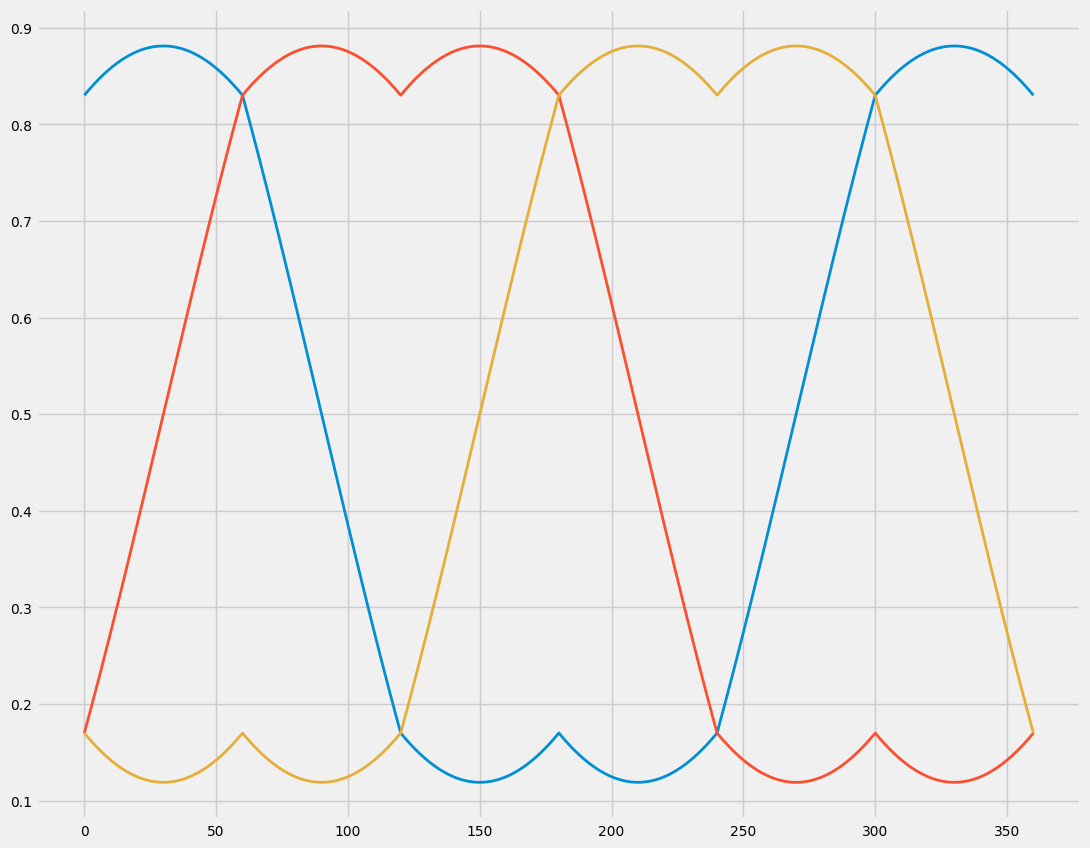

In [3]:
from svpwm import SVPWM


pwm1 = SVPWM(50.0, 1/500.0)

theta = np.linspace(0, 360, 5001)
dcs = np.zeros((3, theta.shape[0]))
for i, theta_i in enumerate(theta):
    Vref = np.array([Vm * np.cos(np.deg2rad(theta_i)), Vm *np.sin(np.deg2rad(theta_i))])
    dcs[:, i] = pwm1.getDC(Vref)

plt.figure(figsize=(12, 10))
plt.plot(theta, dcs[0])
plt.plot(theta, dcs[1])
plt.plot(theta, dcs[2]);

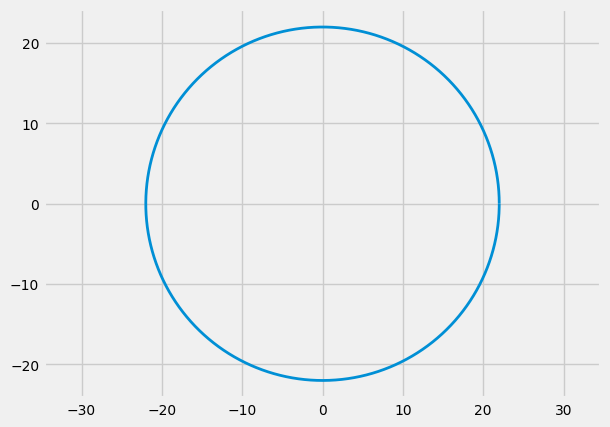

In [4]:
b = np.dot(MClark, dcs[:, 1:])*Vdc
plt.plot(b[0], b[1])
plt.axis('equal');

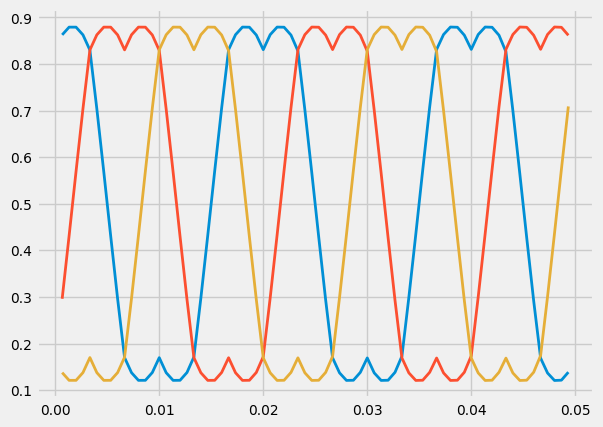

In [24]:
Vdc = 50.0
Vm = 22.0

f_out = 50.0;
f_pwm = 10.0e3;
f_sampling = 1500.0;

T_out = 1.0 / f_out
T_pwm = 1.0 / f_pwm
T_sampling = 1.0 / f_sampling

dt = 1e-6;
t0 = 0.0;
t1 = 0;
tstop = 50e-3;

pwm1 = SVPWM(Vdc, T_sampling)
dcs = []
while t1 <= tstop:
    elapsed = t1 - t0
    if elapsed >= T_sampling:
        Vref = [Vm*np.cos(2*np.pi*f_out * t1), Vm*np.sin(2*np.pi*f_out*t1)]
        dcs.append([t1, *pwm1.getDC(Vref)])
        t0 = t1
        
    t1 = t1 + dt
    
    
dcs = np.array(dcs)
plt.plot(dcs[:, 0], dcs[:,1:4]);

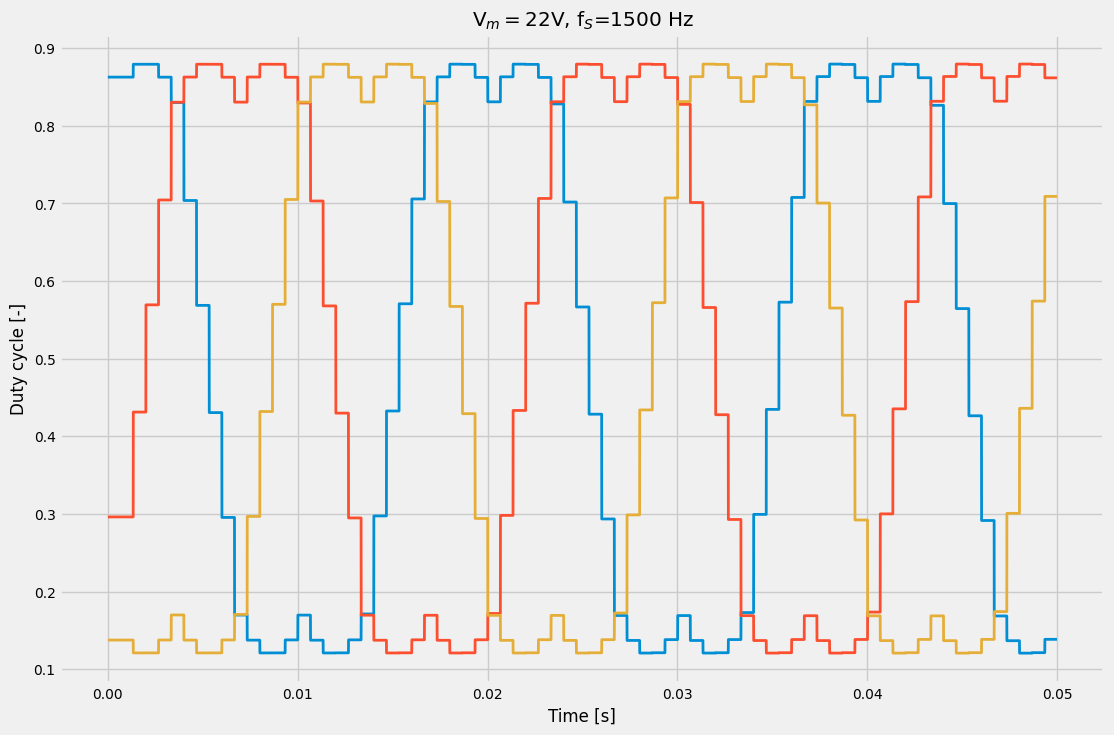

In [25]:
from scipy import interpolate

t = np.linspace(0, 50e-3, 150000)
dcfU = interpolate.interp1d(dcs[:, 0], dcs[:, 1], kind='zero', fill_value="extrapolate")
dcfV = interpolate.interp1d(dcs[:, 0], dcs[:, 2], kind='zero', fill_value="extrapolate")
dcfW = interpolate.interp1d(dcs[:, 0], dcs[:, 3], kind='zero', fill_value="extrapolate")

plt.figure(figsize=(12, 8))
plt.plot(t, dcfU(t), label='U');
plt.plot(t, dcfV(t), label='U');
plt.plot(t, dcfW(t), label='U');
plt.xlabel("Time [s]")
plt.ylabel("Duty cycle [-]")
plt.title(f"V$_m=22$V, f$_S$={f_sampling:.0f} Hz")
plt.savefig(f"../media/dc-sampling-{f_sampling:.0f}.png")


pwms = np.zeros((3, t.shape[0]))
for i, ti in enumerate(t):
    vtri = (0.5 + 0.5 * ftri(ti+T_pwm/4, T_pwm, 1))
    if dcfU(ti) >= vtri:
        pwms[0, i] = 1.0
        
    if dcfV(ti) >= vtri:
        pwms[1, i] = 1.0
        
    if dcfW(ti) >= vtri:
        pwms[2, i] = 1.0

In [7]:
np.savetxt("../IR2101/U.txt",np.array([t, pwms[0]*5.0]).T,fmt='%1.8e %.1f')
np.savetxt("../IR2101/V.txt",np.array([t, pwms[1]*5.0]).T,fmt='%1.8e %.1f')
np.savetxt("../IR2101/W.txt",np.array([t, pwms[2]*5.0]).T,fmt='%1.8e %.1f')

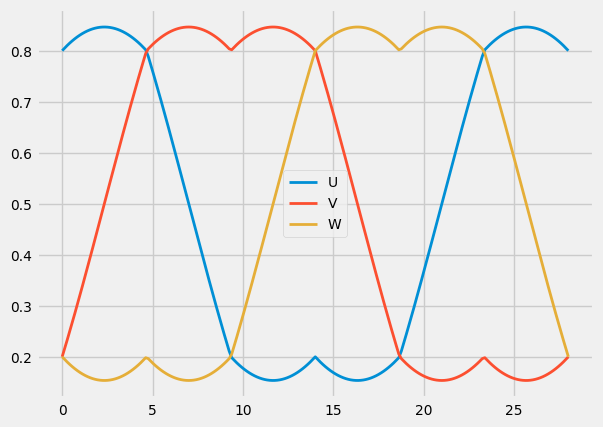

In [9]:
thetas = np.linspace(0, 2*np.pi, 201)
dcs = np.array([pwm.getDC([20*np.cos(thi), 20*np.sin(thi)]) for thi in thetas]).T


plt.plot(vms, dcs[0]);
plt.plot(vms, dcs[1]);
plt.plot(vms, dcs[2]);
plt.legend(['U', 'V', 'W']);

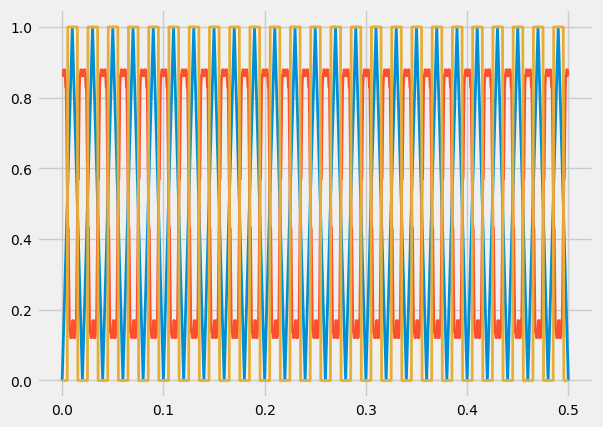

In [47]:
def tri(x, a=1, p=1/50):
    return 0.5+0.5*(2*a/np.pi*np.arcsin(np.sin(2*np.pi/p*x-np.pi/2)))
    
t = np.linspace(0, 500e-3, 1001)
a = 1
p = 1/50

pwmU = np.zeros_like(t)
idx = dcfU(np.fmod(t,p)) <= tri(t)
pwmU[idx] = 1.0
plt.plot(t, tri(t))
plt.plot(t, dcfU(np.fmod(t,p)))
plt.plot(t, pwmU)